# TF-IDF + Truncated SVD + SVM

In [79]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))

In [80]:
X_train = newsgroups_train.data
y_train = newsgroups_train.target
X_test = newsgroups_test.data
y_test = newsgroups_test.target


In [139]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=5,max_df=0.1)
X_tfidf_train = vectorizer.fit_transform(X_train)
X_tfidf_test = vectorizer.transform(X_test)

In [140]:
X_tfidf_train.shape

(11314, 17988)

In [144]:
from sklearn.decomposition import TruncatedSVD
from matplotlib import pyplot as plt
svd = TruncatedSVD(n_components=200, n_iter=7, random_state=42)
X_SVD_train = svd.fit_transform(X_tfidf_train)
X_SVD_test = svd.transform(X_tfidf_test)

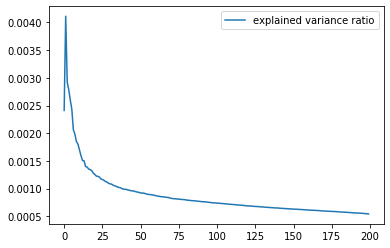

Total varianza explicada:  0.1754386503899495


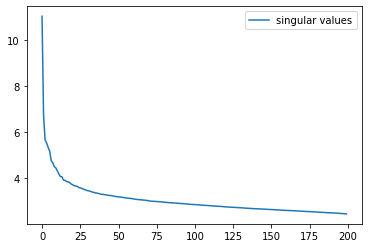

In [145]:
plt.plot(svd.explained_variance_ratio_, label="explained variance ratio")
plt.legend()
plt.show()
print("Total varianza explicada: ", svd.explained_variance_ratio_.sum())
plt.plot(svd.singular_values_, label = "singular values")
plt.legend()
plt.show()

In [146]:
from sklearn import svm
classifier = svm.SVC(kernel="linear")
classifier.fit(X_SVD_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [147]:
classifier.score(X_SVD_test, y_test)

0.608072225172597

In [148]:
# TF-IDF + Random Projections + Truncated SVD + SVM

In [149]:
from sklearn.random_projection import johnson_lindenstrauss_min_dim

In [150]:
#Calculo las dimensiones a las que puedo bajar la dimensionalidad con un error de distancia de 0.1
johnson_lindenstrauss_min_dim(11314,0.1)

8000

In [151]:
from sklearn import random_projection

In [152]:
transformer = random_projection.SparseRandomProjection(n_components=8000)

In [153]:
X_RP_train = transformer.fit_transform(X_tfidf_train)
X_RP_test = transformer.transform(X_tfidf_test)

In [154]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
pca = PCA(n_components=100)
X_PCA_train = pca.fit_transform(X_RP_train.todense())
X_PCA_test = pca.transform(X_RP_test.todense())

In [155]:
from sklearn import svm
classifier = svm.SVC(kernel="linear")
classifier.fit(X_PCA_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [156]:
classifier.score(X_PCA_test, y_test)

0.5549654806160382

# TF-IDF + NMF + SVM

In [157]:
from sklearn.decomposition import NMF

In [158]:
model = NMF(20, verbose=True, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd',tol=0.003)

In [159]:
W_train = model.fit_transform(X_tfidf_train)
W_test = model.transform(X_tfidf_test)
H = model.components_

violation: 1.0
violation: 0.17357751029522198
violation: 0.07675850775706619
violation: 0.047577402001488404
violation: 0.033117258240167355
violation: 0.02234015603511708
violation: 0.014300254131601818
violation: 0.009971034999135327
violation: 0.007185911554929486
violation: 0.005684527206898183
violation: 0.0047950765384238364
violation: 0.004250381857512521
violation: 0.003960275152547514
violation: 0.0038497678160117903
violation: 0.003833541684235986
violation: 0.0038749446063320405
violation: 0.003931195451042045
violation: 0.003947958172353785
violation: 0.0039392560544129675
violation: 0.0038788044331695116
violation: 0.0037692968794796797
violation: 0.0036919150755539048
violation: 0.0036527398097495785
violation: 0.0036495064578728783
violation: 0.0036498108860833294
violation: 0.0036150284967537
violation: 0.0035281227318437057
violation: 0.003376670414273421
violation: 0.0032095215522861672
violation: 0.0030214366539793418
violation: 0.0028368340354844343
Converged at ite

In [160]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [161]:
model.components_.shape

(20, 17988)

In [162]:
print_top_words(model, vectorizer.get_feature_names() , 20)

Topic #0: re us did really something our going over off go back problem said ll still since take might things years
Topic #1: windows dos ms running os microsoft nt version drivers 386 driver mouse using run files problem printer file under system
Topic #2: geb dsl n3jxp chastity cadre shameful pitt intellect skepticism surrender gordon banks soon edu lyme blood weight patients probably medical
Topic #3: god jesus bible christ faith believe christians christian him heaven sin hell our life lord truth church belief christianity eternal
Topic #4: key chip encryption clipper keys escrow algorithm government security secure system encrypted nsa des public enforcement secret privacy bit chips
Topic #5: drive disk drives hard floppy ide boot controller cd hd internal cable computer system disks tape rom switch external meg
Topic #6: mail address send email list edu mailing post interested info reply phone sale advance via fax information someone internet lost
Topic #7: game team games year p

In [163]:
newsgroups_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

# Visualización usando SVD, TSNE e Isomap

In [170]:
from sklearn.manifold import TSNE, Isomap, MDS
from matplotlib import pyplot as plt

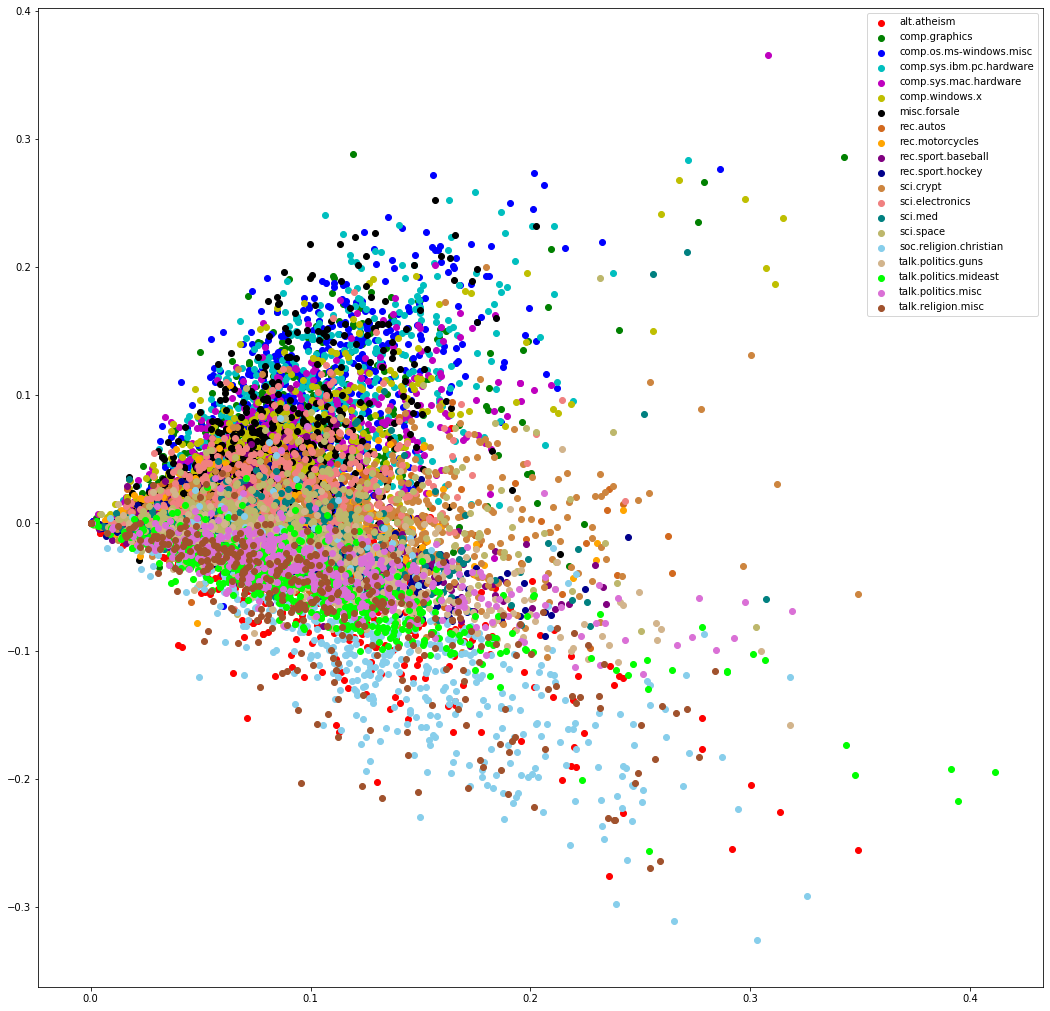

In [165]:
manifold = TruncatedSVD(n_components=2)
plt.figure(figsize=[18,18])
X_embedded = manifold.fit_transform(X_SVD_train)
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'chocolate', 'orange', 'purple', "darkblue", "peru", "lightcoral", "teal","darkkhaki", "skyblue", "tan", "lime", "orchid", "sienna"
for i, c, label in zip(list(range(20)), colors, newsgroups_train.target_names):
    plt.scatter(X_embedded[y_train == i, 0], X_embedded[y_train == i, 1], c=c, label=label)
plt.legend()
plt.show()

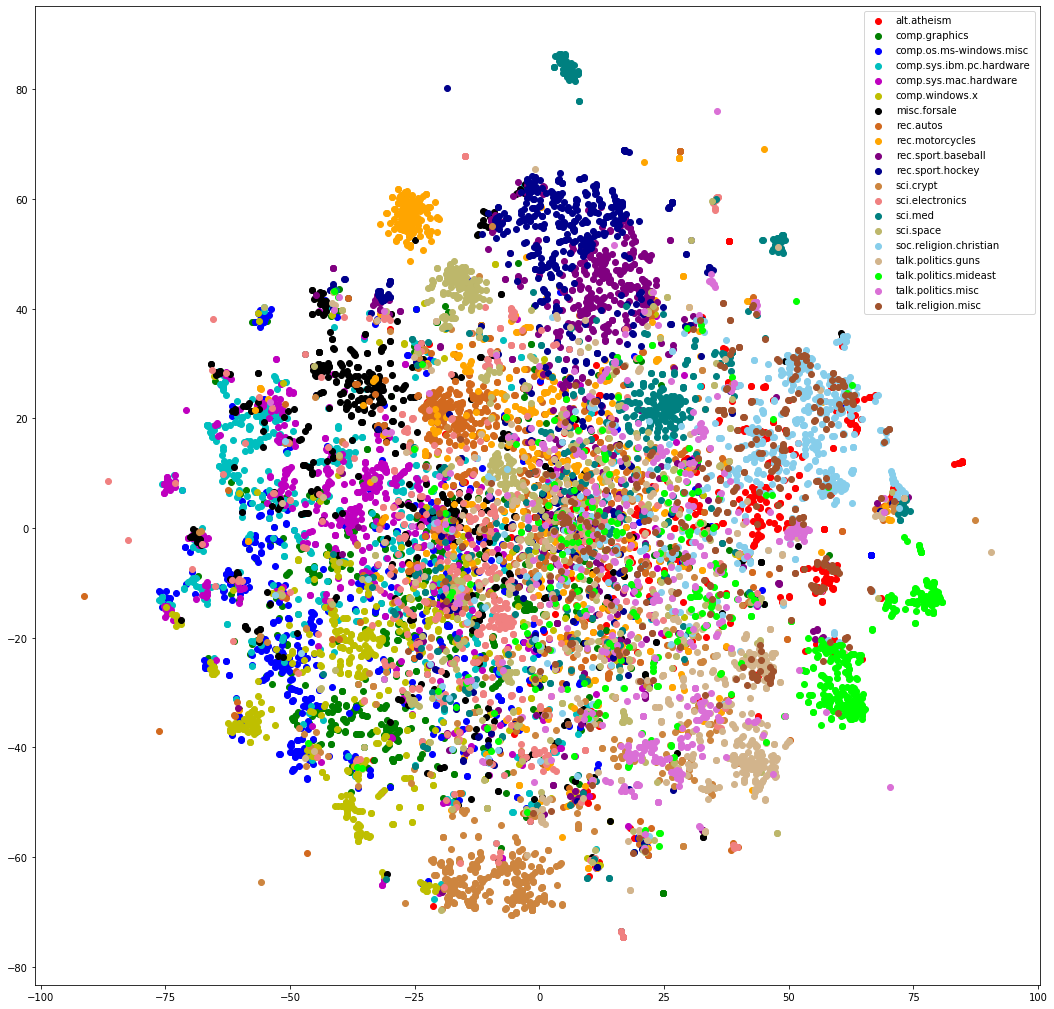

In [166]:
manifold = TSNE(n_components=2, init="pca")
plt.figure(figsize=[18,18])
X_embedded = manifold.fit_transform(X_SVD_train)
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'chocolate', 'orange', 'purple', "darkblue", "peru", "lightcoral", "teal","darkkhaki", "skyblue", "tan", "lime", "orchid", "sienna"
for i, c, label in zip(list(range(20)), colors, newsgroups_train.target_names):
    plt.scatter(X_embedded[y_train == i, 0], X_embedded[y_train == i, 1], c=c, label=label)
plt.legend()
plt.show()

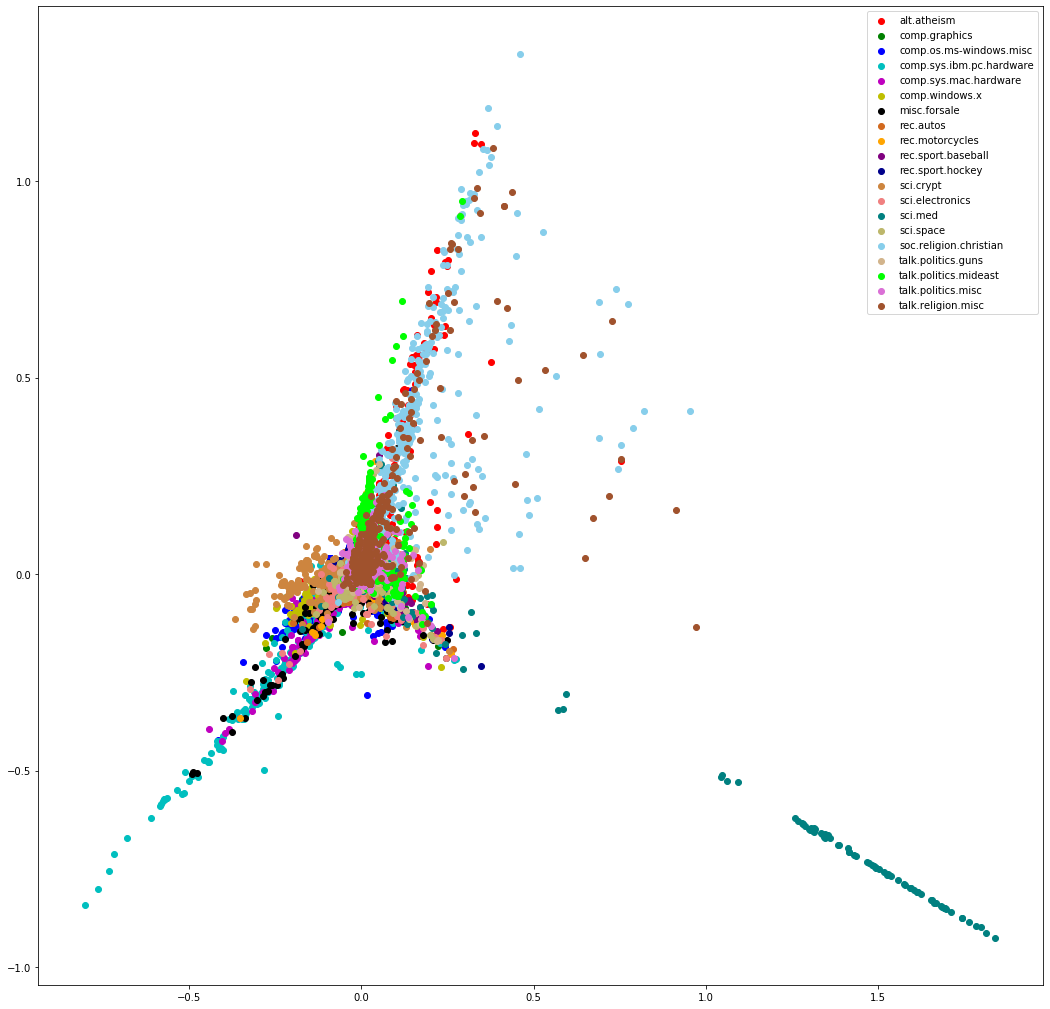

In [168]:
manifold = Isomap(n_neighbors=10, n_components=2)
plt.figure(figsize=[18,18])
X_embedded = manifold.fit_transform(X_SVD_train)
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'chocolate', 'orange', 'purple', "darkblue", "peru", "lightcoral", "teal","darkkhaki", "skyblue", "tan", "lime", "orchid", "sienna"
for i, c, label in zip(list(range(20)), colors, newsgroups_train.target_names):
    plt.scatter(X_embedded[y_train == i, 0], X_embedded[y_train == i, 1], c=c, label=label)
plt.legend()
plt.show()


# TDIDF + SVD + KMeans

In [195]:
from sklearn.cluster import KMeans, AffinityPropagation
import numpy as np

In [191]:
y_test_dummy = np.random.randint(0,20,len(y_test))

In [192]:
clu = KMeans(n_clusters=20, random_state=0).fit(X_SVD_train)
y_pred = clu.predict(X_SVD_test)


In [193]:
from sklearn.metrics.cluster import normalized_mutual_info_score
normalized_mutual_info_score(y_test_dummy, y_pred)

/home/cselmo/miniconda3/envs/NLP/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


0.008463026653208455

In [194]:
normalized_mutual_info_score(y_test, y_pred)

0.3120105162650409

In [203]:
clu = AffinityPropagation(0.95).fit(X_SVD_test)
y_pred = clu.predict(X_SVD_test)

In [198]:
normalized_mutual_info_score(y_test, y_pred)

/home/cselmo/miniconda3/envs/NLP/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


0.33469471648492766

In [201]:
set(clu.labels_)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
